In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


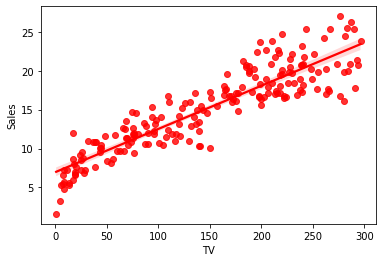

In [7]:
#seaborn
import seaborn as sns
sns.regplot(x=df['TV'],y=y,color='red')

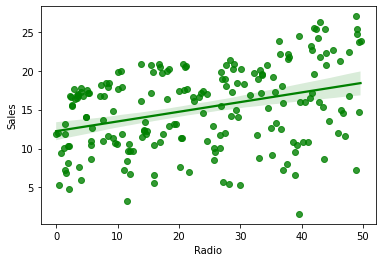

In [8]:
import seaborn as sns
sns.regplot(x=df['Radio'],y=y,color='green')

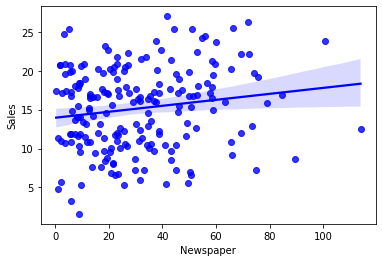

In [9]:
import seaborn as sns
sns.regplot(x=df['Newspaper'],y=y,color='blue')

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)



In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [12]:
print("Slope is",model.coef_)

Slope is [0.05358869 0.10270677 0.00793167]


In [13]:
list(zip(x,model.coef_))
print("intercept is",model.intercept_)


intercept is 4.743766701589685


In [14]:
df1=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred})
df1

,Actual value,Predicted value
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368
115,12.6,12.781013
69,22.3,21.086363
170,8.4,8.760542
174,16.5,17.115000
45,16.1,16.687896


In [15]:
from sklearn.metrics import mean_absolute_error
print("Error is",mean_absolute_error(y_test,y_pred))

Error is 1.1594875061090582


In [16]:
from sklearn.metrics import mean_absolute_percentage_error
print("Percentage error is",mean_absolute_percentage_error(y_test,y_pred))

Percentage error is 0.10536440823029307


In [17]:
from sklearn.metrics import mean_squared_error
z=mean_squared_error(y_test,y_pred)

In [18]:
print(np.sqrt(z))

1.5942471691143587


In [19]:
from sklearn.metrics import r2_score
print("R2 score is",r2_score(y_test,y_pred))

R2 score is 0.9091484341849799
